# “107年上半年造成人員當場或24小時內死亡之交通事故資料”(A1類)分析

In [100]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib as mpl
mpl.rc('font', family='Noto Serif CJK TC')

## 1. 讀入並且檢視資料

In [101]:
df = pd.read_csv("https://quality.data.gov.tw/dq_download_csv.php?nid=12818&md5_url=d7d787eb0d492bc0f7924241d481874a")

df.head(10)

,發生時間,發生地點,死亡受傷人數,車種,經度,緯度
0,107年01月01日 05時12分00秒,彰化縣大村鄉貢旗村田洋巷7號前0.0公尺東側,死亡1;受傷0,自用-小客車;腳踏自行車-慢車,120.578892,23.962235
1,107年01月01日 14時55分00秒,桃園市蘆竹區大竹北路418號前0.0公尺北側,死亡1;受傷0,普通輕型-機車,121.244920,25.036777
2,107年01月01日 17時10分13秒,苗栗縣竹南鎮中美里澎湖厝83號前,死亡1;受傷3,自用-小客車;乘客-人;乘客-人;乘客-人,120.861178,24.682004
3,107年01月01日 17時30分20秒,南投縣集集鎮投54 6公里西向中內,死亡1;受傷0,普通重型-機車;民營公車-大客車,120.771165,23.827210
4,107年01月01日 19時30分00秒,彰化縣和美鎮大霞里彰和路3段509號前0.0公尺前,死亡1;受傷0,自用-小客車;行人-人;自用-小客車,120.502953,24.102967
5,107年01月02日 09時51分00秒,雲林縣虎尾鎮平和橋與防汛道路口,死亡1;受傷0,普通重型-機車;自用-小客車,120.458930,23.700923
6,107年01月02日 10時00分00秒,桃園市中壢區中豐路北側 / 桃園市中壢區永嘉街,死亡1;受傷1,自用-小客車;普通重型-機車;乘客-人,121.219521,24.959527
7,107年01月02日 13時34分00秒,新北市樹林區中正路 / 新北市樹林區三俊街,死亡1;受傷0,自用-大貨車;普通重型-機車,121.371249,24.923638
8,107年01月02日 15時30分59秒,花蓮縣豐濱鄉台11線 67公里40.0公尺處北,死亡1;受傷0,其他車-其他車,121.524078,23.579573
9,107年01月02日 16時10分00秒,雲林縣元長鄉台19線元進莊路口,死亡1;受傷0,普通重型-機車;民營客運-大客車,120.310998,23.629405


## 2. 嘗試依據經緯度畫出散布圖

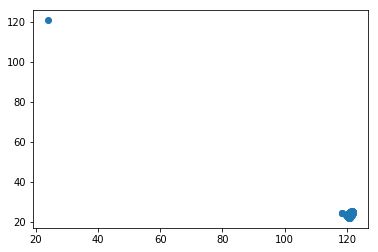

In [102]:
plt.scatter(x=df['經度'], y=df['緯度'])
plt.show()

### 在不正常的經緯度(緯度>120??)的地方有數據，推測是數據有誤

In [103]:
df[df['緯度']>120]

,發生時間,發生地點,死亡受傷人數,車種,經度,緯度
11,107年01月02日 16時29分00秒,臺中市東區旱溪里旱溪街前0.0公尺,死亡1;受傷1,普通重型-機車;普通重型-機車,24.140329,120.696681


### "發生地點"為台中市，推測是經緯度弄反了，將經度和緯度互換回來

In [104]:
df.loc[11, '經度'], df.loc[11, '緯度'] = df.loc[11, '緯度'], df.loc[11, '經度']

### 重新繪圖

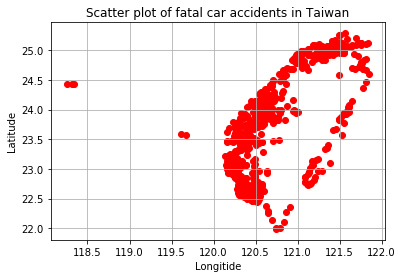

In [105]:
import matplotlib.pyplot as plt
plt.scatter(x=df['經度'], y=df['緯度'], color='r');
plt.xlabel('Longitide')
plt.ylabel('Latitude')
plt.title('Scatter plot of fatal car accidents in Taiwan');
plt.grid(True);

### 可以看出傷亡事件大部份發生在人口較密集，交通較便利的地方

### 去除不必要的資料

In [106]:
df.tail()

,發生時間,發生地點,死亡受傷人數,車種,經度,緯度
700,107年07月15日 00時50分00秒,雲林縣大埤鄉溝心路北門59號電桿,死亡1;受傷1,普通重型-機車;乘客-人,120.431110,23.668296
701,107年07月15日 12時22分00秒,嘉義縣水上鄉南和村163線14公里200公尺處東向車道,死亡1;受傷3,自用-小客車;自用-小貨車(含客、貨兩用);乘客-人;乘客-人,120.363564,23.410225
702,107年07月15日 19時57分00秒,花蓮縣秀林鄉崇德村崇德144之1號前,死亡1;受傷0,行人-人;自用-小客車;乘客-人,121.648875,24.151228
703,資料提供日期：107年07月23日,NaN,NaN,NaN,NaN,NaN
704,事故類別：A1類,NaN,NaN,NaN,NaN,NaN


In [107]:
df = df[0:703]
df.tail()

,發生時間,發生地點,死亡受傷人數,車種,經度,緯度
698,107年07月14日 18時32分00秒,嘉義縣太保市東勢里信義二路與博愛路口,死亡1;受傷2,自用-小客車;普通重型-機車;乘客-人,120.296705,23.464592
699,107年07月14日 23時15分36秒,南投縣名間鄉名松路1段237號東側,死亡1;受傷0,普通重型-機車,120.669773,23.837590
700,107年07月15日 00時50分00秒,雲林縣大埤鄉溝心路北門59號電桿,死亡1;受傷1,普通重型-機車;乘客-人,120.431110,23.668296
701,107年07月15日 12時22分00秒,嘉義縣水上鄉南和村163線14公里200公尺處東向車道,死亡1;受傷3,自用-小客車;自用-小貨車(含客、貨兩用);乘客-人;乘客-人,120.363564,23.410225
702,107年07月15日 19時57分00秒,花蓮縣秀林鄉崇德村崇德144之1號前,死亡1;受傷0,行人-人;自用-小客車;乘客-人,121.648875,24.151228


## 2. 分離死亡人數以及受傷人數

In [108]:
import re
# 利用regex分離死亡人數以及受傷人數
df.insert(3, '死亡人數', df['死亡受傷人數'].apply(lambda string: (re.findall(r'\d+', string))[0]).astype(int));
df.insert(4, '受傷人數', df['死亡受傷人數'].apply(lambda string: (re.findall(r'\d+', string))[1]).astype(int));

df.head(10)

,發生時間,發生地點,死亡受傷人數,死亡人數,受傷人數,車種,經度,緯度
0,107年01月01日 05時12分00秒,彰化縣大村鄉貢旗村田洋巷7號前0.0公尺東側,死亡1;受傷0,1,0,自用-小客車;腳踏自行車-慢車,120.578892,23.962235
1,107年01月01日 14時55分00秒,桃園市蘆竹區大竹北路418號前0.0公尺北側,死亡1;受傷0,1,0,普通輕型-機車,121.244920,25.036777
2,107年01月01日 17時10分13秒,苗栗縣竹南鎮中美里澎湖厝83號前,死亡1;受傷3,1,3,自用-小客車;乘客-人;乘客-人;乘客-人,120.861178,24.682004
3,107年01月01日 17時30分20秒,南投縣集集鎮投54 6公里西向中內,死亡1;受傷0,1,0,普通重型-機車;民營公車-大客車,120.771165,23.827210
4,107年01月01日 19時30分00秒,彰化縣和美鎮大霞里彰和路3段509號前0.0公尺前,死亡1;受傷0,1,0,自用-小客車;行人-人;自用-小客車,120.502953,24.102967
5,107年01月02日 09時51分00秒,雲林縣虎尾鎮平和橋與防汛道路口,死亡1;受傷0,1,0,普通重型-機車;自用-小客車,120.458930,23.700923
6,107年01月02日 10時00分00秒,桃園市中壢區中豐路北側 / 桃園市中壢區永嘉街,死亡1;受傷1,1,1,自用-小客車;普通重型-機車;乘客-人,121.219521,24.959527
7,107年01月02日 13時34分00秒,新北市樹林區中正路 / 新北市樹林區三俊街,死亡1;受傷0,1,0,自用-大貨車;普通重型-機車,121.371249,24.923638
8,107年01月02日 15時30分59秒,花蓮縣豐濱鄉台11線 67公里40.0公尺處北,死亡1;受傷0,1,0,其他車-其他車,121.524078,23.579573
9,107年01月02日 16時10分00秒,雲林縣元長鄉台19線元進莊路口,死亡1;受傷0,1,0,普通重型-機車;民營客運-大客車,120.310998,23.629405


## 3. 統計每月死亡和受傷人數

In [109]:
time_death_injured_df = pd.DataFrame(columns=['Month', 'Death', 'Injured'])

for i in range(0, 7):
    # 得到每月的資料
    current_month_df = df[df['發生時間'].apply(lambda string: (re.findall(r'\d+', string))[1]).astype(int) == i+1]
    # 統計人數
    time_death_injured_df.loc[i] = [i + 1, current_month_df['死亡人數'].sum(), current_month_df['受傷人數'].sum()]
    
time_death_injured_df.head(7)

,Month,Death,Injured
0,1,128,52
1,2,82,58
2,3,121,62
3,4,118,44
4,5,113,35
5,6,126,42
6,7,32,19


## 4. 將死亡和受傷人數繪製為長條圖

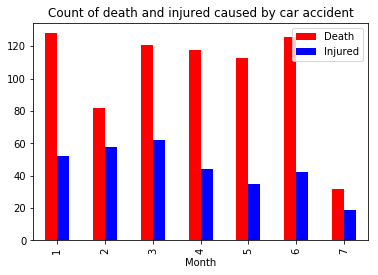

In [110]:
time_death_injured_df.plot(x='Month', y=['Death', 'Injured'], color=['r', 'b'], kind='bar', title='Count of death and injured caused by car accident');

### 除了二月死亡人數明顯較少，其他月份之間的傷亡人數並無太大的差異
### (7月只包含了上半月的資料，所以死亡和受傷人數明顯較少)